# Sentiment Analysis using Python

<p>IMDB movies dataset</p>

Algorithms :

- NBSVM (Naive Bayes - SVM)
- FASTTEXT
- BERT
- DistilBERT


In [0]:
!pip install ktrain

In [0]:
%tensorflow_version 2.x
import ktrain
from ktrain import text
import tensorflow as tf
import os.path
import pandas as pd
import numpy as np
from glob import glob
import os,re,string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize  
from nltk.tokenize import PunktSentenceTokenizer

using Keras version: 2.2.4-tf


In [0]:
dataset = tf.keras.utils.get_file(fname="aclImdb.tar.gz",origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",extract=True,)

84131840/84125825 [==============================] - 4s 0us/step


In [0]:
datadir = os.path.join(os.path.dirname(dataset), 'aclImdb')
print(datadir)

/root/.keras/datasets/aclImdb


# Preprocessing

In [0]:
def clean_text(txtfile):
    #Removing HTML tags:
    cleaner = re.compile('<.*?>')
    cleaned = re.sub(cleaner, ' ', txtfile)
    #Removing special characters:
    regexp = r'[^a-zA-z0-9\s]'
    cleaned = re.sub(regexp,' ', cleaned)
    #Stemming
    #stemmer=nltk.porter.PorterStemmer()
    #cleaned= ' '.join([stemmer.stem(word) for word in cleaned.split()])
    
    return(cleaned)
    

In [0]:
clean_text('<br>text*</br>')

' text  '

In [0]:
def load_data(path,folders):
    reviews,sents=[],[]
    for idx,label in enumerate(folders):
        for txtname in glob(os.path.join(path,label,'*')):
            txtfile=open(txtname,'r', encoding="utf8").read()
            txtfile=clean_text(txtfile)
            reviews.append(txtfile)
            sents.append(idx)
            
    print('Data loaded succesfully')        
    return reviews,np.array(sents).astype(np.int8)  

In [0]:
x_train,y_train=load_data(f'{datadir}/train',['neg','pos'])
x_test,y_test=load_data(f'{datadir}/test',['neg','pos'])

Data loaded succesfully
Data loaded succesfully


In [0]:
x_train[0]

'roommat sugar and bobbi lee are abduct by menac dude while out shop one day and taken back to a seclud island that the girl reluctantli tell the thug that they last visit when they were ten year of age and that a fortun is locat on all that just pretti much bookend a movi that is pretti much one long flashback about the girl first visit to the island and subsequ fight with a cannibalist famili thi one is extrem horribl act by everyon involv to the point that I start feel bad for poor hank worden who truli deserv much much better As much as I didn t like barracuda that s on the same dvd I have to admit that thi film make that one look like citizen kane eye candi one pair of tit they might belong to kirsten baker My grade F dark ski dvd extra vintag ad for variou drive in food and trailer for bonni s kid featur nuditi the centerfold girl part time wife featur nuditi psychic killer eaten aliv the dvd also come with 1978 s barracuda'

In [0]:
(x_train,y_train),(x_test,y_test),preproc = text.texts_from_array(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test,max_features=80000,
                                                                  maxlen=2000,ngram_range=2,preprocess_mode='standard',class_names=['neg','pos'])

task: text classification
language: en
Word Counts: 74980
Nrows: 25000
25000 train sequences
train sequence lengths:
	mean : 238
	95percentile : 610
	99percentile : 929
Adding 2-gram features
max_features changed to 1465722 with addition of ngrams
Average train sequence length with ngrams: 475
train (w/ngrams) sequence lengths:
	mean : 476
	95percentile : 1219
	99percentile : 1857
x_train shape: (25000,2000)
y_train shape: (25000, 2)
25000 test sequences
test sequence lengths:
	mean : 231
	95percentile : 585
	99percentile : 907
Average test sequence length with ngrams: 421
test (w/ngrams) sequence lengths:
	mean : 422
	95percentile : 1060
	99percentile : 1629
x_test shape: (25000,2000)
y_test shape: (25000, 2)


# **Using NBSVM**


---



In [0]:
#(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder(datadir,max_features=80000, maxlen=500,ngram_range=2,preprocess_mode='standard',classes=['pos', 'neg'])

In [0]:
text.print_text_classifiers()

fasttext: a fastText-like model (http://arxiv.org/pdf/1607.01759.pdf)
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model (http://www.aclweb.org/anthology/P12-2018)
bigru: Bidirectional GRU with pretrained word vectors (https://arxiv.org/abs/1712.09405)
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (https://arxiv.org/abs/1810.04805)


In [0]:
model = text.text_classifier('nbsvm', (x_train, y_train), preproc=preproc)
#model.save('/tmp/NBSVM_predictor')

Is Multi-Label? False
compiling word ID features...
maxlen is 2000
building document-term matrix... this may take a few moments...
rows: 1-10000
rows: 10001-20000
rows: 20001-25000
computing log-count ratios...
done.


In [0]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

simulating training for different learning rates... this may take a few moments...
Train on 25000 samples
Epoch 1/1024
25000/25000 [==============================] - 10s 404us/sample - loss: 0.6664 - accuracy: 0.6862
Epoch 2/1024
20416/25000 [=======================>......] - ETA: 1s - loss: 0.3316 - accuracy: 0.9232

done.


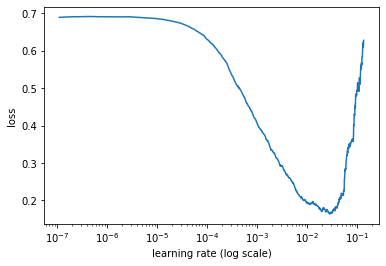

In [0]:
learner.lr_find(show_plot=True)

In [0]:
learner.reset_weights()

Model weights have been reset.


In [0]:
learner.fit(0.001, 5, cycle_len=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 12s 463us/sample - loss: 0.2134 - accuracy: 0.9333 - val_loss: 0.2482 - val_accuracy: 0.9118
Epoch 2/5
25000/25000 [==============================] - 12s 463us/sample - loss: 0.0760 - accuracy: 0.9832 - val_loss: 0.2372 - val_accuracy: 0.9154
Epoch 3/5
25000/25000 [==============================] - 11s 455us/sample - loss: 0.0435 - accuracy: 0.9941 - val_loss: 0.2320 - val_accuracy: 0.9169
Epoch 4/5
25000/25000 [==============================] - 12s 485us/sample - loss: 0.0281 - accuracy: 0.9972 - val_loss: 0.2299 - val_accuracy: 0.9160
Epoch 5/5
25000/25000 [==============================] - 12s 487us/sample - loss: 0.0193 - accuracy: 0.9987 - val_loss: 0.2293 - val_accuracy: 0.9157


# **USING FASTTEXT**


---



In [0]:
#(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder(datadir,max_features=80000, maxlen=2000,ngram_range=2,preprocess_mode='standard',classes=['pos', 'neg'])

In [0]:
model = text.text_classifier('fasttext', (x_train, y_train), preproc=preproc)


Is Multi-Label? False
compiling word ID features...
maxlen is 2000
done.


In [0]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

simulating training for different learning rates... this may take a few moments...
Train on 25000 samples
Epoch 1/1024
25000/25000 [==============================] - 431s 17ms/sample - loss: 1.1210 - accuracy: 0.5011
Epoch 2/1024
25000/25000 [==============================] - 431s 17ms/sample - loss: 0.7065 - accuracy: 0.5934
Epoch 3/1024
 2720/25000 [==>...........................] - ETA: 6:23 - loss: 22.6590 - accuracy: 0.5070

done.


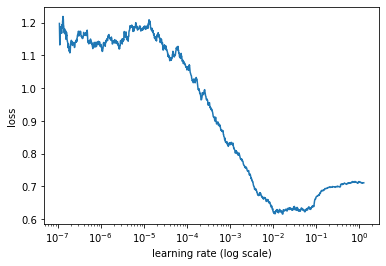

In [0]:
learner.lr_find(show_plot=True)

In [0]:
learner.reset_weights()

In [0]:
learner.autofit(0.001, 3)



begin training using triangular learning rate policy with max lr of 0.01...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 419s 17ms/sample - loss: 0.5938 - accuracy: 0.6886 - val_loss: 0.3980 - val_accuracy: 0.8383
Epoch 2/3
25000/25000 [==============================] - 413s 17ms/sample - loss: 0.3941 - accuracy: 0.8262 - val_loss: 0.3341 - val_accuracy: 0.8569
Epoch 3/3
25000/25000 [==============================] - 410s 16ms/sample - loss: 0.2986 - accuracy: 0.8756 - val_loss: 0.3245 - val_accuracy: 0.8678


In [0]:
learner.autofit(0.001, 3)



begin training using triangular learning rate policy with max lr of 0.001...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 410s 16ms/sample - loss: 0.2253 - accuracy: 0.9090 - val_loss: 0.3195 - val_accuracy: 0.8698
Epoch 2/3
25000/25000 [==============================] - 404s 16ms/sample - loss: 0.2071 - accuracy: 0.9152 - val_loss: 0.3196 - val_accuracy: 0.8723
Epoch 3/3
25000/25000 [==============================] - 400s 16ms/sample - loss: 0.1942 - accuracy: 0.9241 - val_loss: 0.3210 - val_accuracy: 0.8729


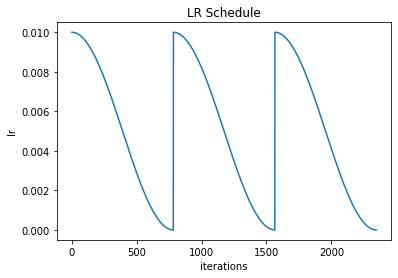

In [0]:
learner.plot('lr')

# **USING BERT**


---





In [0]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder(datadir,maxlen=512,preprocess_mode='bert',train_test_names=['train','test'],classes=['pos', 'neg'])

detected encoding: utf-8
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


preprocessing test...
language: en


In [0]:
model = text.text_classifier('bert', (x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model,train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=6)
#model.save('/tmp/BERT_model')

Is Multi-Label? False
maxlen is 512
done.


In [0]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Train on 25000 samples
Epoch 1/1024
   48/25000 [..............................] - ETA: 2:39:50 - loss: 0.8893 - acc: 0.5417

In [0]:
learner.fit_onecycle(2e-5, 1)




begin training using onecycle policy with max lr of 2e-05...
Train on 25000 samples, validate on 25000 samples
25000/25000 [==============================] - 8466s 339ms/sample - loss: 0.1282 - accuracy: 0.9545 - val_loss: 0.1590 - val_accuracy: 0.9424


# **Using DISTILBERT**

In [0]:
!pip install git+https://github.com/amaiya/eli5@tfkeras_0_10_1

  Cloning https://github.com/amaiya/eli5 (to revision tfkeras_0_10_1) to /tmp/pip-req-build-iq1xnz_v
  Running command git clone -q https://github.com/amaiya/eli5 /tmp/pip-req-build-iq1xnz_v
  Running command git checkout -b tfkeras_0_10_1 --track origin/tfkeras_0_10_1
  Switched to a new branch 'tfkeras_0_10_1'
  Branch 'tfkeras_0_10_1' set up to track remote branch 'tfkeras_0_10_1' from 'origin'.
  Created wheel for eli5: filename=eli5-0.10.1-py2.py3-none-any.whl size=106681 sha256=54668c90f57a1020517b90dee8418d2382acfaa060418f037b4bb0cbc24b1492
  Stored in directory: /tmp/pip-ephem-wheel-cache-m3dxgtio/wheels/51/59/0a/0f48442b8d209583a4453580938d7ba2270aca40edacee6d45
Successfully built eli5


In [0]:
transf=text.Transformer('distilbert-base-uncased',maxlen=500,classes=['0','1'])

In [0]:
x_train[0]

'Roommates Sugar and Bobby Lee are abducted by menacing dudes while out shopping one day and taken back to a secluded island that the girls reluctantly tell the thugs that they last visited when they were ten years of age and that a fortune is located on  All that just pretty much bookends a movie that is pretty much one long flashback about the girls first visit to the island and subsequent fight with a cannibalistic family   This one is extremely horribly acted by everyone involved to the point that I started feeling bad for poor Hank Worden who truly deserved much MUCH better  As much as I didn t like  Barracuda   that s on the same DVD  I have to admit that this film makes that one look like Citizen Kane   Eye Candy  one pair of tits  they might belong to Kirsten Baker    My Grade  F   Dark Sky DVD Extras  Vintage ads for various drive in food  and Trailers for  Bonnie s Kids   features nudity    the Centerfold Girls    Part time Wife   features nudity    Psychic Killer      Eaten 

In [0]:
train=transf.preprocess_train(x_train,y_train)
test=transf.preprocess_test(x_test,y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 238
	95percentile : 610
	99percentile : 929


preprocessing test...
language: en
test sequence lengths:
	mean : 233
	95percentile : 593
	99percentile : 916


In [0]:
transf.get_classes()

['0', '1']

In [0]:
model = transf.get_classifier()
learner = ktrain.get_learner(model, train_data=train, val_data=test, batch_size=6)

simulating training for different learning rates... this may take a few moments...
Train for 4166 steps
Epoch 1/1024
1506/4166 [=========>....................] - ETA: 30:40 - loss: 1.0053 - accuracy: 0.6034

done.


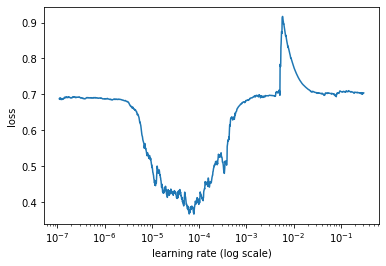

In [0]:
learner.lr_find(show_plot=True)

In [0]:
learner.fit_onecycle(5e-5, 1)



begin training using onecycle policy with max lr of 5e-05...
Train for 4167 steps, validate for 4167 steps
4167/4167 [==============================] - 3828s 919ms/step - loss: 0.2917 - accuracy: 0.8764 - val_loss: 0.1879 - val_accuracy: 0.9255


In [0]:
predictor=ktrain.get_predictor(learner.model,preproc=transf)

In [0]:
predictor.save('/tmp/distilbert_imdb')

In [0]:
y_test[0]

0

In [0]:
predictor.predict(x_test[30])

'0'

# **PREDICTING SENTIMENTS**


---



In [0]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [0]:
data = [ 'good for watching','good for nothing',
        'This movie got me the chills from the beggining.Stunning visuals and good performance',
        'I hated this movie','I have to do five projects at the same time.I guess u dont have to sleep every day.',
        'The film wasnt what i expected.In a bad way.',
        'I enjoyed this movie.Good production',
        ]

In [0]:
def sentiment_analysis(strings):
    print('Sentiments:\n ',predictor.get_classes())
    print('')
    print('-'*100)
    for sent in strings :
        print(sent,'|--->',predictor.predict(sent))
        print('-'*100)
  
    print('Probabilities:')  
    print(predictor.predict(strings, return_proba=True))

In [3]:
sentiment_analysis(data)

NameError: ignored

In [0]:
predictor.explain(x_test[0])

In [0]:
#predictor.save('/tmp/dbert_predictor')

In [0]:
#predictor = ktrain.load_predictor('/tmp/my_moviereview_predictor')

In [0]:
#predictor.predict(['Groundhog Day is my favorite movie of all time!'])